In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from scipy.special import gamma

# plotting options
import matplotlib as mpl
mpl.rc('font',**{'family':'sans-serif','size':14})
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [4]:
e=4.8e-10
m=9.11e-28
c=3e10
k=1.38e-16
# Mpc to cm
Mpc=3.08e24

def A(p):
    return 2**(p-3./2.)*(p+7./3.)/(p+1.)*gamma(p/4.+7./12.)*gamma(p/4.-1./12)

def synchpl(n,B,gmin,gmax,p,sinalpha,nu):
    nub=e*B/2./np.pi/m/c
    return np.sqrt(3.)*n*e**2.*(p-1)*nub*sinalpha/4./c/(gmin**(1-p)-gmax**(1-p))*(nu/(3./2.)*nub*sinalpha)**(-(p-1)/2.)*A(p)

# Analyze a mystery object's power law synchrotron spectrum

## Spectrum

The object's angular size at 86 GHz is $\sim 0.01$ mas ($\simeq 5x10^{-11}$ rad), in an observation where flux density $F_\nu = 0.235$ Jy with $1$ Jy = $10^{-23}$ erg cm$^{-2}$ s$^{-1}$ Hz$^{-1}$, and it is at a distance $D = 140$ Mpc from Earth

Text(0, 0.5, 'monochromatic flux $\\nu F_\\nu$ (erg cm$^{-2}$ s$^{-1}$)')

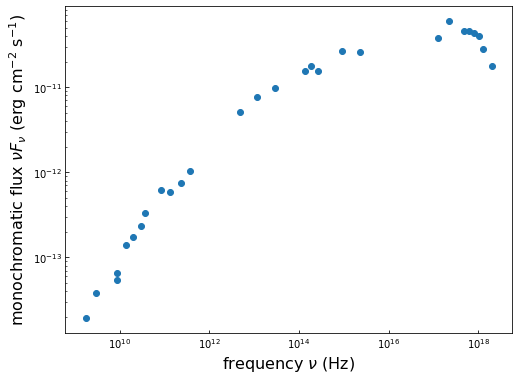

In [3]:
# load data
data = ascii.read('astr5710_mysteryobject1.csv',format='csv')

plt.figure(figsize=(8,6))
plt.loglog(data['nu'],data['nuFnu'],marker='o',linestyle='')
plt.xlabel(r'frequency $\nu$ (Hz)',fontsize=16); plt.ylabel(r'monochromatic flux $\nu F_\nu$ (erg cm$^{-2}$ s$^{-1}$)',fontsize=16)

## 1. What values of p do you see at low and high frequencies? What range of e- energies is present (e.g. what is $\gamma_{\rm max}/\gamma_{\rm min}$ for each power law)?

## 2. Brightness temperature

Calculate the observed brightness temperature, assuming the source is a sphere

$$T_b = \frac{c^2 I_\nu}{2 k \nu^2}$$

## 3. Magnetic field estimate

A power law synchrotron spectrum is composed of the sum of contributions from electrons of different energies. A useful approximation is that each observed frequency is mostly produced by electrons whose Lorentz factor $\gamma$ is such that $\nu_c(\gamma) = \nu$.

Show that for a single electron, this approximation allows an estimate of the magnetic field strength $B$ when $\gamma$ is known. Using $\gamma m_e c^2 \approx 3 k T$ and setting $T = T_b$ from the previous part, estimate the magnetic field strength of the mystery object. You can assume that $\sin \alpha = 1/2$.

Given that brightness temperature is a lower limit to the true temperature, how does this estimate of $B$ compare to the actual value?

## 4. What are the minimum and maximum electron energies present?

Use the observed spectrum and your estimate for $B$ to calculate the cutoff Lorentz factor, $\gamma_{\rm max}$. Further assume that the lowest measured frequency corresponds to $\nu_c(\gamma_{\rm min})$, and estimate $\gamma_{\rm min}$.

## 5. Particle density estimate

Finally, use these parameters and the power law emissivity (the function jnupl above) along with your solution from Problem Set 1 for the flux density from a uniform, optically thin sphere to estimate the particle density $n_e$.

For this estimate, you can use the source size $R$ at $\nu = 86$ GHz and the corresponding values of $F_\nu$ and $p$ from the source spectrum.

## 6. What is the mystery object?

Given the properties you've calculated, what can you say about the mystery object? What types of astronomical objects do you think it could be and why?